In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 8.5
fig_height = 5.5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcZGFuaWVsLmNhcnBlbnRlclxEb2N1bWVudHNcR2l0SHViXFBlcnNvbmFsLUdpdFxQZXJzb25hbC1XZWJzaXRlLURldg=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

C:\Users\daniel.carpenter\AppData\Local\Temp\ipykernel_42340\779637531.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\daniel.carpenter\\AppData\\Local\\Programs\\Python\\Python39\\lib\\importlib\\_bootstrap.py": 1613765346.0, "C:\\Users\\daniel.carpenter\\AppData\\Local\\Programs\\Python\\Python39\\lib\\importlib\\_bootstrap_external.py": 1613765346.0, "C:\\Users\\daniel.carpenter\\AppData\\Local\\Programs\\Python\\Python39\\lib\\codecs.py": 1613765346.0, "C:\\Users\\daniel.carpenter\\AppData\\Local\\Programs\\Python\\Python39\\lib\\encodings\\aliases.py": 1613765346.0, "C:\\Users\\daniel.carpenter\\AppData\\Local\\Programs\\Python\\Python39\\lib\\encodings\\__init__.py": 1613765346.0, "C:\\Users\\daniel.carpenter\\AppData\\Local\\Programs\\Python\\Python39\\lib\\encodings\\utf_8.py": 1613765346.0, "C:\\Users\\daniel.carpenter\\AppData\\Local\\Programs\\Python\\Python39\\lib\\encodings\\latin_1.py": 1613765346.0, "C:\\Users\\daniel.carpenter\\AppData\\Local\\Programs\\Python\\Python39\\lib\\abc.py": 1613765346.0, "C:\\Users\\daniel.carpenter\\AppData\\Local\\Programs\\Python\\Python39\\li

In [2]:
#| code-fold: true
# Set working directory to the R project directory
import sys
import os

sys.path.append(os.getcwd() + "//docs//02-Optimization//01-PSO-Portfolio//")

# Import custom classes
import datetime                  as dt  # For dates
import StockFinanceMPT           as mpt # Stock pull from yfinance in current wrkdir
import SimulateOptimalPortfolios as sop # Run simulations of global best portfolios
import ViewSimulatedPortfolios   as vsp # Wrapper class to plot, export, etc., simulations

In [3]:
# List of stock tickers to pull data
StockTickers = ['NVDA', 'MSFT', 'AAPL', 'AMZN', 'META', 
                'AVGO', 'GOOGL', 'GOOG', 'TSLA','JPM', 
                'WMT', 'V', 'LLY', 'ORCL', 'MA', 'NFLX', 
                'XOM', 'JNJ', 'COST', 'HD', 'BAC'
]

# Date range for stock & t-bill data pull - default last 10 years
maxDate = dt.datetime.today()                    # Max date to pull from
minDate = maxDate - dt.timedelta(days = 15*365) # Min date to pull from

# Pull stock data
PulledStockData = mpt.StockFinanceMPT(StockTickers, minDate, maxDate)

YF.download() has changed argument auto_adjust default to True


[                       0%                       ]

[*****                 10%                       ]  2 of 21 completed

[*******               14%                       ]  3 of 21 completed

[*******               14%                       ]  3 of 21 completed

[************          24%                       ]  5 of 21 completed

[************          24%                       ]  5 of 21 completed

[************          24%                       ]  5 of 21 completed

[**********************52%                       ]  11 of 21 completed

[**********************57%**                     ]  12 of 21 completed

[**********************57%**                     ]  12 of 21 completed

[**********************86%****************       ]  18 of 21 completed

[**********************90%******************     ]  19 of 21 completed

[**********************95%*********************  ]  20 of 21 completed

[*********************100%***********************]  21 of 21 completed

[*********************100%***********************]  1 of 1 completed

In [4]:
# Create the simulation
simulatedPortfolios = sop.SimulateOptimalPortfolios(    
    PulledStockData,               # Using the pulled stock data above
    totalSimulations    = 1500,    # Number of min risk portfolio's to simulate
    totalIterations     = 25,      # Total number of iterations (or movements within one simulation)
    numPorfolios        = 15,      # Total number of portfolios in a swarm. 
    minDesiredReturn    = 0.07     # Targeted expected return, soft constraint
    )

simulatedPortfolios.runSimulation() # Run the simulation given parameters above

In [5]:
# Create the viewer wrapper class
simulationViewer = vsp.ViewSimulatedPortfolios(simulatedPortfolios, displayResults = False)

In [6]:
simulationViewer.plotRiskVsReturnVsSharpe(TRANSPARENCY_LEVEL=0.33)

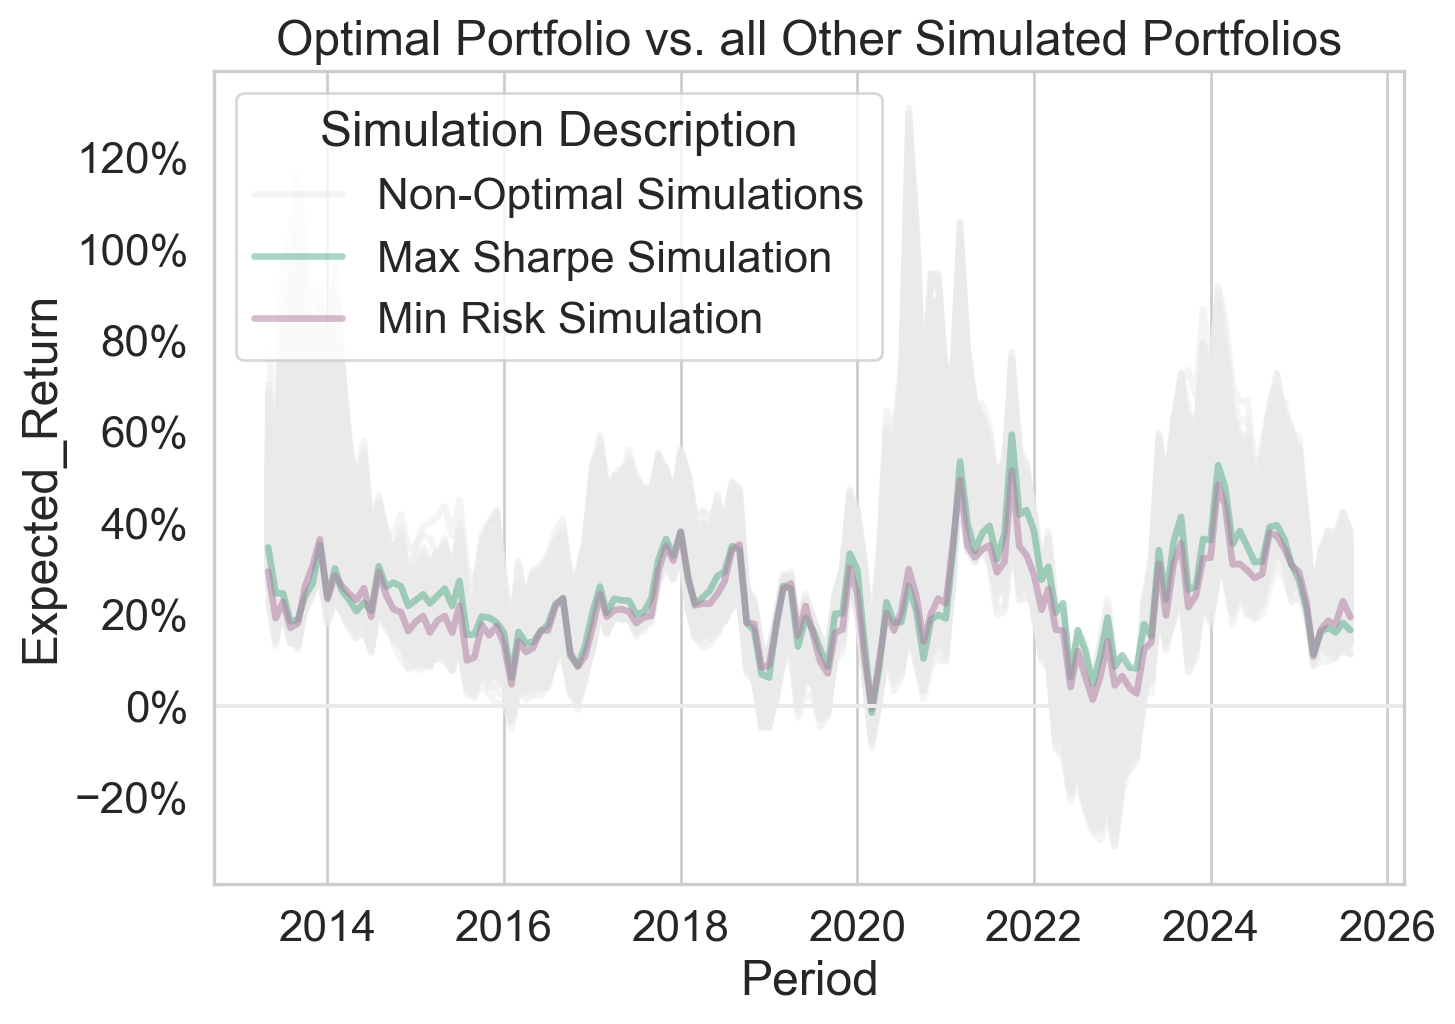

In [7]:
simulationViewer.plotOptimalVsNonOptSimulations()

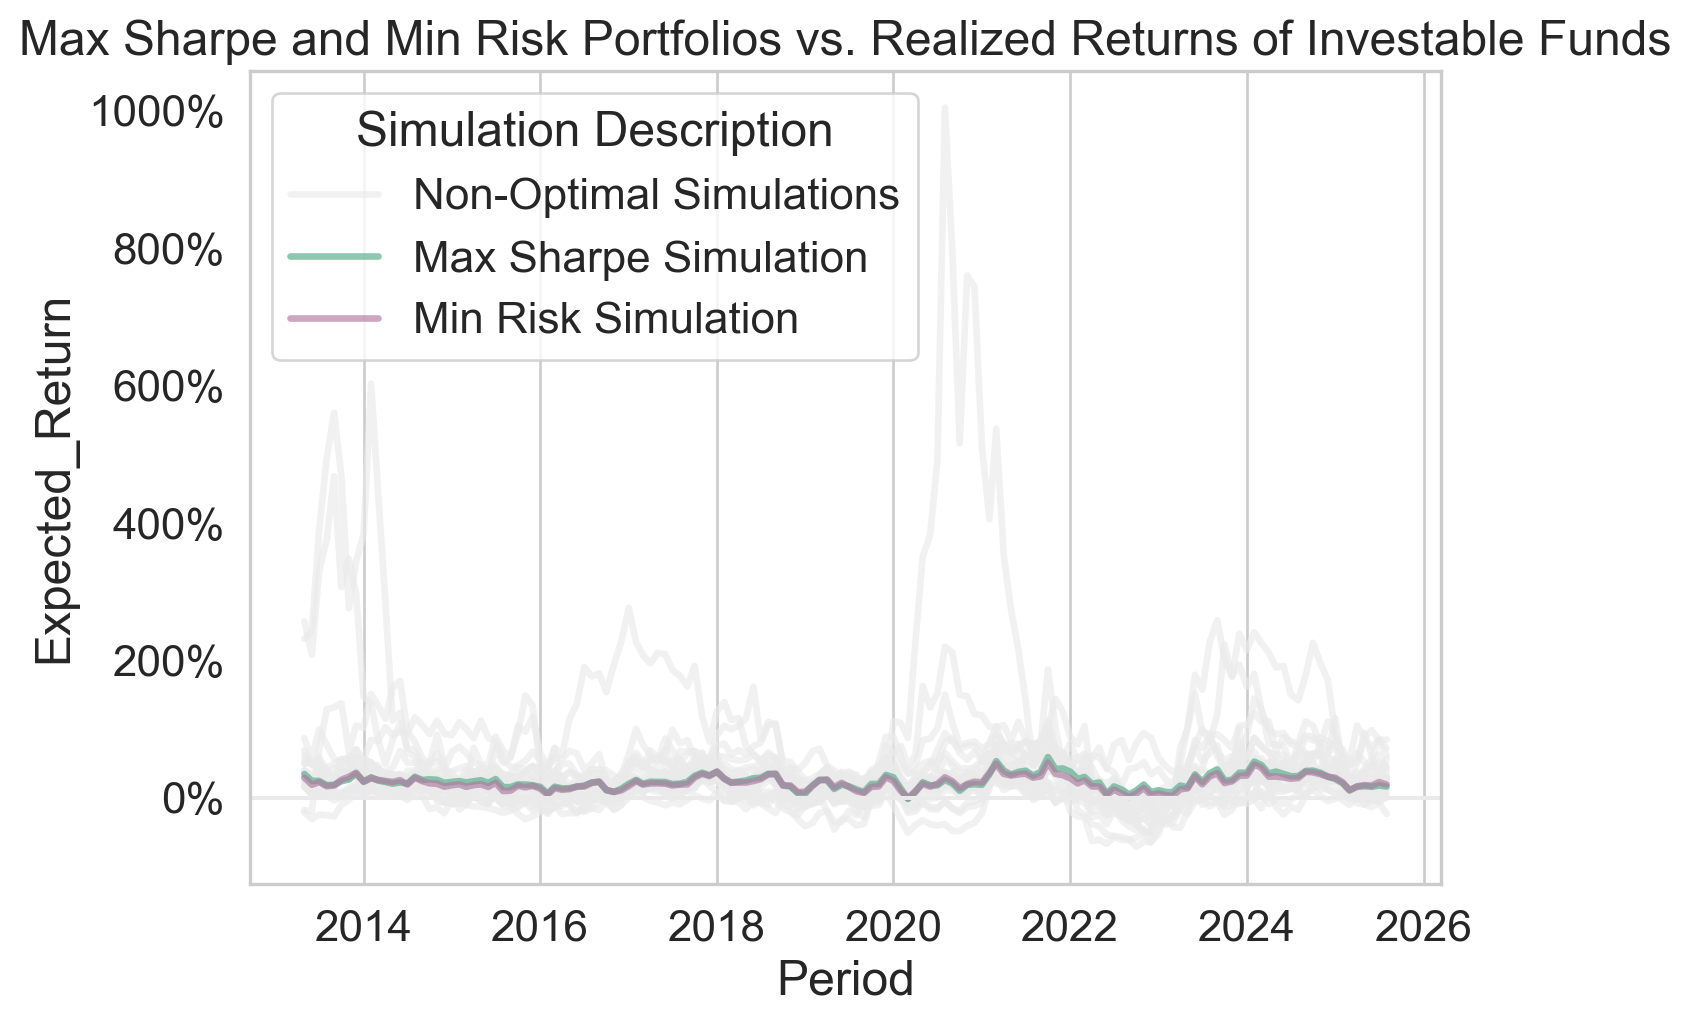

In [8]:
simulationViewer.plotOptimalVsRealizedReturns()

In [9]:
# Exports all Weights Data and Plots to dated folder
simulationViewer.exportSimulationData()

Input_Parameters saved to:		 Output_Data/2025-09-02 15_38/Input_Parameters.csv
All_Simulated_Weights saved to:		 Output_Data/2025-09-02 15_38/All_Simulated_Weights.csv
All_Simulated_Weights_Stats saved to:		 Output_Data/2025-09-02 15_38/All_Simulated_Weights_Stats.csv
Min_Risk_Portfolio saved to:		 Output_Data/2025-09-02 15_38/Min_Risk_Portfolio.csv
Max_Sharpe_Portfolio saved to:		 Output_Data/2025-09-02 15_38/Max_Sharpe_Portfolio.csv


Expected_Returns saved to:		 Output_Data/2025-09-02 15_38/Expected_Returns.csv
Expected_Returns_Stats saved to:		 Output_Data/2025-09-02 15_38/Expected_Returns_Stats.csv


In [10]:
#| eval: false # NOT RUN

# Inspect that the sum of weights constraint is met (100%)
simulationViewer.checkSumOfWeights()

# Invested Variability among assets
simulationViewer.plotPortfolioVarianceStats(figHeight=7, figWidth=5)

# Process all output at once
simulationViewer.processAllOutputAtOnce()